# Kaggle Competition IRL: https://www.kaggle.com/c/titanic

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

In [2]:
import math
import common 
import pandas as pd
import numpy as np

# Data Explore

In [85]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [87]:
train_df[train_df['Fare'] < 10]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S


In [4]:
gender_encoding = {'male': 1, 'female': 2}
train_df['SexEncoded'] = train_df['Sex'].map(gender_encoding).fillna(0)
test_df['SexEncoded'] = test_df['Sex'].map(gender_encoding).fillna(0)

In [5]:
def age_encoding(x):
    if x is np.nan or x is None or math.isnan(x):
        return 0
        
    elif x < 10: 
        return 1
    elif x < 20:
        return 2
    elif x < 30:
        return 3
    elif x < 40:
        return 4
    elif x < 50:
        return 5
    elif x < 60:
        return 6
    else:
        return 7
train_df['AgeEncoded'] = train_df['Age'].map(age_encoding)
test_df['AgeEncoded'] = test_df['Age'].map(age_encoding)

Top 5 Rows
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  SexEncoded  AgeEncoded  
0      0         A/5 21171   7.2500   NaN        S           1           3  
1      0          PC 17599  71.2833   C85        C           2           4  
2      0  STON/O2. 3101282   7.9250   NaN        S           2           3  
3

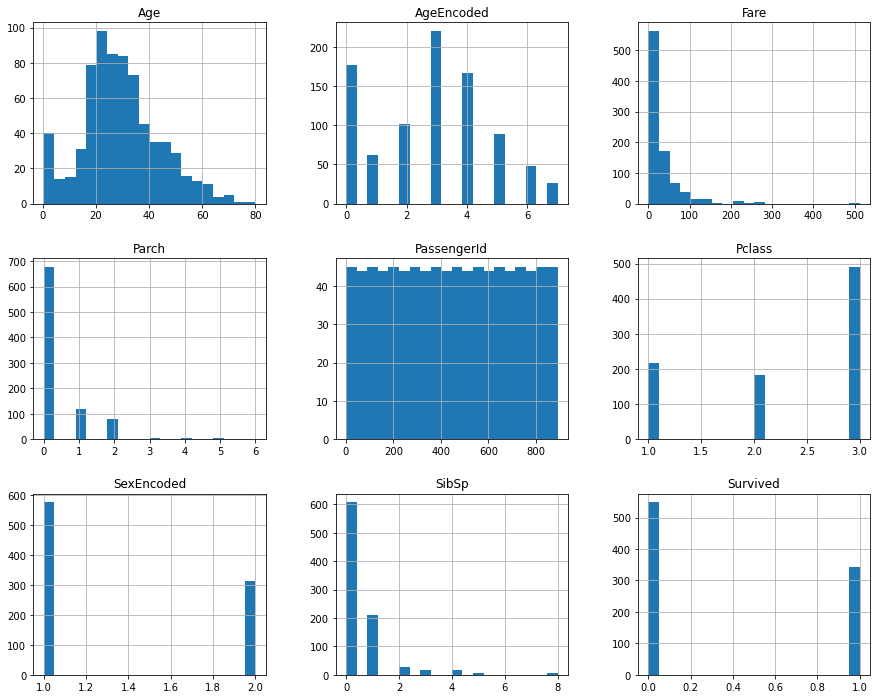

In [6]:
common.explore_dataframe(train_df)

Top 5 Rows
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  SexEncoded  AgeEncoded  
0  34.5      0      0   330911   7.8292   NaN        Q           1           4  
1  47.0      1      0   363272   7.0000   NaN        S           2           5  
2  62.0      0      0   240276   9.6875   NaN        Q           1           7  
3  27.0      0      0   315154   8.6625   NaN        S           1           3  
4  22.0      1      1  3101298  12.2875   NaN        S           2           3  
Basics Statistics
    

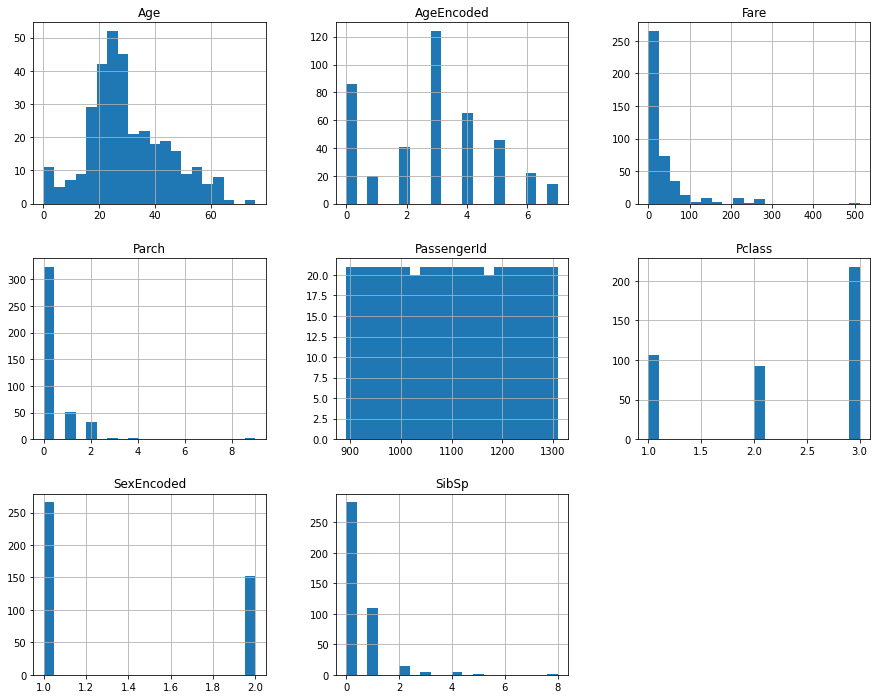

In [7]:
common.explore_dataframe(test_df)

## Finding
1: training and testing have similar feature distribution. Good

2: testing fare has 1 missing while traing has no missing value. Bad


# Seems that Sex, Age, Pclass and Fare are most critical features

In [74]:
train_df.groupby(['Pclass']).agg({'Survived': ['count', 'mean']})

Survived                Fare                           
          count      mean       max  min       mean        std
Pclass                                                        
1           216  0.629630  512.3292  0.0  84.154687  78.380373
2           184  0.472826   73.5000  0.0  20.662183  13.417399
3           491  0.242363   69.5500  0.0  13.675550  11.778142

In [76]:
train_df[train_df['Fare']> 0].groupby(['Pclass']).agg({'Fare': ['max', 'min', 'mean', 'std']})

Fare                               
             max      min       mean        std
Pclass                                         
1       512.3292   5.0000  86.148874  78.212155
2        73.5000  10.5000  21.358661  13.083169
3        69.5500   4.0125  13.787875  11.760718

In [116]:
train_df[(train_df['Sex']=='female')&(train_df['Survived']==0)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S


In [11]:
train_df.groupby(['SexEncoded']).agg({'Survived': ['count', 'mean']})

Survived          
              count      mean
SexEncoded                   
1               577  0.188908
2               314  0.742038

In [12]:
train_df.groupby(['AgeEncoded']).agg({'Survived': ['count', 'mean']})

Survived          
              count      mean
AgeEncoded                   
0               177  0.293785
1                62  0.612903
2               102  0.401961
3               220  0.350000
4               167  0.437126
5                89  0.382022
6                48  0.416667
7                26  0.269231

In [13]:
train_df.groupby(['Embarked']).agg({'Survived': ['count', 'mean']})

Survived          
            count      mean
Embarked                   
C             168  0.553571
Q              77  0.389610
S             644  0.336957

In [100]:
temp2_ = train_df.groupby('Ticket').agg({"Survived": ['mean', 'count']})

In [107]:
temp2_.columns = ['m1', 'c1']

In [113]:
temp2_['t'] = temp2_.index

In [114]:
temp2_.groupby(['m1', 'c1']).count()

t
m1       c1     
0.000000 1   384
         2    25
         3     2
         4     3
         5     2
         6     3
         7     2
0.250000 4     1
0.333333 3     1
0.500000 2    30
         4     2
0.666667 3    11
0.714286 7     1
0.750000 4     3
1.000000 1   163
         2    39
         3     7
         4     2

In [118]:
temp2_[temp2_['c1'] == 1]

,m1,c1,t
Ticket,,,
110564,1.0,1,110564
110813,1.0,1,110813
111240,0.0,1,111240
111320,0.0,1,111320
111369,1.0,1,111369
...,...,...,...
W./C. 14258,1.0,1,W./C. 14258
W./C. 14263,0.0,1,W./C. 14263
W./C. 6609,0.0,1,W./C. 6609


In [53]:
features = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked', 'SexEncoded', 'AgeEncoded']
X_train = train_df[features]
y = train_df['Survived']
X_test = test_df[features]

X_train['Embarked'].fillna('U', inplace=True)   # convert None as a seperate type
X_test['Embarked'].fillna('U', inplace=True)

/Users/yanxu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


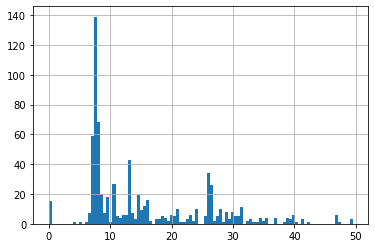

In [81]:
train_df[train_df['Fare'] < 50]['Fare'].hist(bins=100)

In [82]:
train_df[train_df['Fare'] < 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexEncoded,AgeEncoded
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S,1,4
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S,1,5
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S,1,3
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S,1,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,1,2
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C,1,3
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S,1,0
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S,1,0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,1,0
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S,1,5


In [89]:
train_df['Name'].values

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 